# Imports

In [0]:
import matplotlib.pyplot as plt

In [0]:
# Copyright 2017 Google Inc.
# 
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
# 
# https://www.apache.org/licenses/LICENSE-2.0
# 
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

import struct
from struct import unpack


def unpack_drawing(file_handle):
    key_id, = unpack('Q', file_handle.read(8))
    countrycode, = unpack('2s', file_handle.read(2))
    recognized, = unpack('b', file_handle.read(1))
    timestamp, = unpack('I', file_handle.read(4))
    n_strokes, = unpack('H', file_handle.read(2))
    image = []
    for i in range(n_strokes):
        n_points, = unpack('H', file_handle.read(2))
        fmt = str(n_points) + 'B'
        x = unpack(fmt, file_handle.read(n_points))
        y = unpack(fmt, file_handle.read(n_points))
        image.append((x, y))

    return {
        'key_id': key_id,
        'countrycode': countrycode,
        'recognized': recognized,
        'timestamp': timestamp,
        'image': image
    }


def unpack_drawings(filename):
    with open(filename, 'rb') as f:
        while True:
            try:
                yield unpack_drawing(f)
            except struct.error:
                break

In [0]:
def get_drawings(category):
    drawings = []
    for drawing in unpack_drawings(category+'.bin'):
        drawings.append(drawing)
    return drawings

# Data Download

In [0]:
arch = ['barn', 'castle', 'house', 'church', 'garden', 'windmill', 'lighthouse', 'bridge', 'fence', 'hospital', 'skyscraper', 'jail', 'pool', 'tree']
furn = ['stairs', 'door', 'stove', 'sink', 'fireplace', 'table', 'toilet', 'bathtub', 'bed', 'bench', 'chandelier', 'clock', 'couch', 'dresser', 'floor lamp', 'house plant', 'oven']
elec = ['television', 'washing machine', 'ceiling fan', 'dishwasher', 'fan', 'telephone', 'television']

In [10]:
for a in arch:
    print(a)

barn
castle
house
church
garden
windmill
lighthouse
bridge
fence
hospital
skyscraper
jail
pool
tree


In [11]:
!wget 'http://storage.googleapis.com/quickdraw_dataset/full/binary/house.bin'
!wget 'http://storage.googleapis.com/quickdraw_dataset/full/binary/church.bin'
!wget 'http://storage.googleapis.com/quickdraw_dataset/full/binary/skyscraper.bin'
!wget 'http://storage.googleapis.com/quickdraw_dataset/full/binary/tree.bin'

--2019-06-13 19:52:45--  http://storage.googleapis.com/quickdraw_dataset/full/binary/house.bin
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.211.128, 2607:f8b0:400c:c12::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.211.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10927070 (10M) [application/octet-stream]
Saving to: ‘house.bin’

house.bin           100%[===================>]  10.42M  --.-KB/s    in 0.1s    

2019-06-13 19:52:51 (72.5 MB/s) - ‘house.bin’ saved [10927070/10927070]

--2019-06-13 19:52:51--  http://storage.googleapis.com/quickdraw_dataset/full/binary/church.bin
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 2607:f8b0:400c:c12::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15801745 (15M) [application/octet-stream]
Saving to: ‘church.bin’

church.bin        

In [0]:
house      = get_drawings('house')
skyscraper = get_drawings('skyscraper')
church     = get_drawings('church')
tree       = get_drawings('tree')

# Visualisation

## Grid

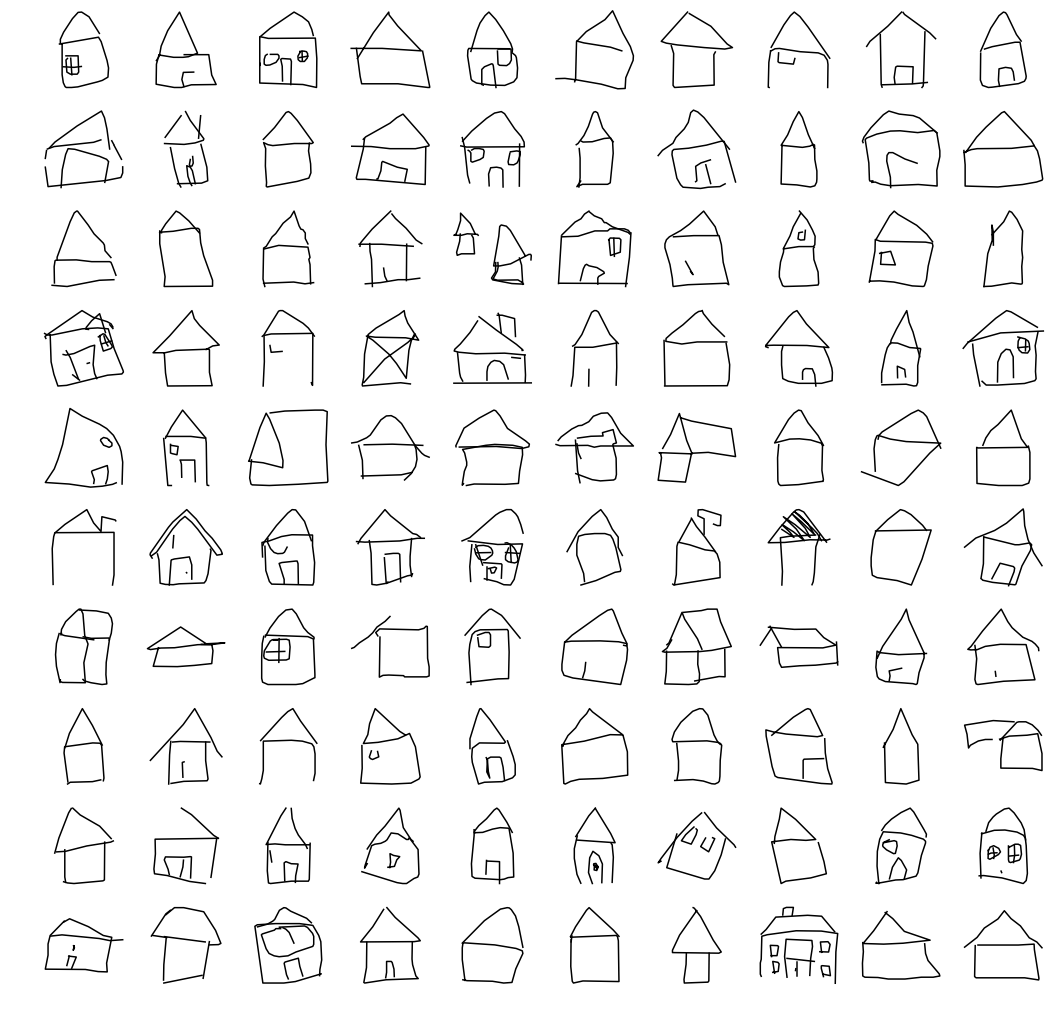

In [13]:
plt.figure(figsize=(18,18))
n=0
i=0
while n<10**2:
    if house[i]['recognized']==0:
        i+=1
        continue
    else:
        plt.subplot(10,10,n+1)
        plt.axis('off')
        plt.axis('equal')
        myhouse = house[i]['image']
        for s in myhouse:
            ys = s[1]
            ys = [-y for y in ys]
            plt.plot(s[0],ys,'k')
        i+=1
        n+=1
plt.savefig('houses.pdf')

## Special Sorting

In [0]:
by_num_strokes = sorted(house[:225], key = lambda i: len(i['image']))

## Arbitrary Placement

In [0]:
import random

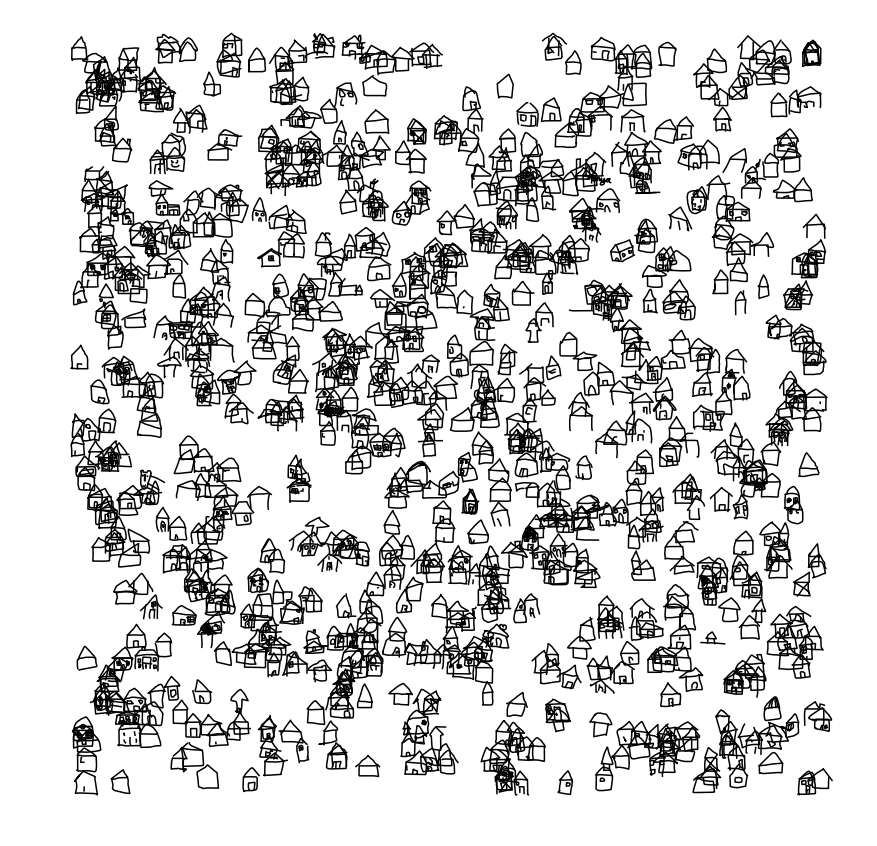

In [16]:
plt.figure(figsize=(15,15))
plt.axis('equal')
plt.axis('off')
for i in range(1000):
    sk = house[i]['image']
    px = random.random()*800
    py = random.random()*800
    for s in sk:
        ys = s[1]
        ys = [py-y/10.0 for y in ys]
        xs = s[0]
        xs = [px+x/10.0 for x in xs]
        plt.plot(xs,ys,'k')

## From Image

In [0]:
from skimage import io

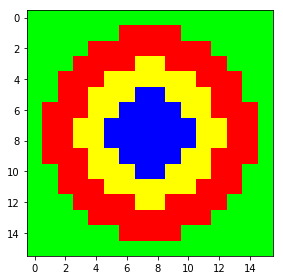

In [18]:
pic = io.imread('city.png')
io.imshow(pic)

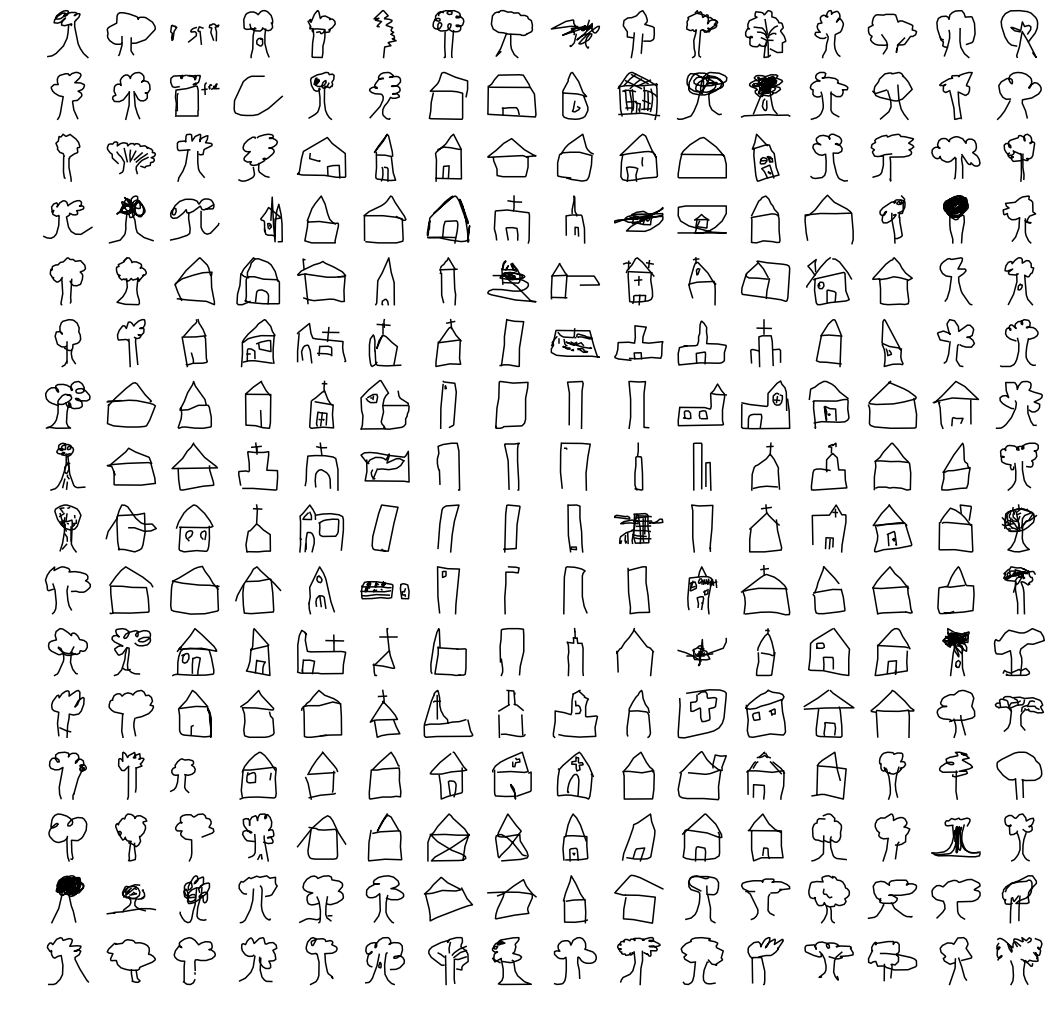

In [19]:
plt.figure(figsize=(18,18))
for i in range(16**2):
    r = i//16
    c = i%16
    p = pic[r,c,:]
    if list(p)==[0,255,0]:
        sk = random.choice(tree)['image']
    elif list(p)==[255,0,0]:
        sk = random.choice(house)['image']
    elif list(p)==[255,255,0]:
        sk = random.choice(church)['image']
    else:
        sk = random.choice(skyscraper)['image']
    plt.subplot(16,16,i+1)
    plt.axis('off')
    plt.axis('equal')
    for s in sk:
        ys = s[1]
        ys = [-y for y in ys]
        plt.plot(s[0],ys,'k')

### My House is my Castle

Generate 1-3 city maps made of QuickDraw sketches from different categories, using some of the tutorial material (custom sorting, random distribution, image driven, …). Upload the maps as a vector drawing (PDF) together with the notebook.

## Exercise